# A.I. Assignment 2

***Exercise 1***

Load the dataset *WA_Fn-UseC_-Telco-Customer-Churn.csv* provided. Perform transformations on it so it is prepared to build a model (scaling the numerical data and the cathegorical features transformed in numerical integer labels.  

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# We load (using pandas) our csv
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.drop(columns=["customerID"], inplace=True)

# We now select the categorical columns, and encode their categorical variables into integer labels
cat_cols = df.select_dtypes(include=["object"]).columns
encoder = OrdinalEncoder()
df[cat_cols] = encoder.fit_transform(df[cat_cols])

# Finally we will scale our numerical features, to ensure zero mean and unit variance
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,-1.277445,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,-1.160323,-0.398608,0.0
1,1.0,0,0.0,0.0,0.066327,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,-0.259629,-0.948762,0.0
2,1.0,0,0.0,0.0,-1.236724,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,-0.362660,-1.641883,1.0
3,1.0,0,0.0,0.0,0.514251,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,-0.746535,-0.983710,0.0
4,0.0,0,0.0,0.0,-1.236724,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.197365,-1.235224,1.0


The snippets of code below implement the linear regression equations on the observed predictors and responses, which we'll call the training data set.  Let's walk through the code.

We have to reshape our arrrays to 2D. We will see later why.

* Let's run this function and see the coefficients

The values of `a` and `b` seem roughly reasonable.  They capture the positive correlation.  The line does appear to be trying to get as close as possible to all the points.

## 4 - Building a model with `statsmodels` and `sklearn`

Now that we can concretely fit the training data from scratch, let's learn two `python` packages to do it all for us:
* [statsmodels](http://www.statsmodels.org/stable/regression.html) and 
* [scikit-learn (sklearn)](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Our goal  is to show how to implement simple linear regression with these packages.  For an important sanity check, we compare the $a$ and $b$ from `statsmodels` and `sklearn` to the ones that we found from above with our own implementation.

For the purposes of this lab, `statsmodels` and `sklearn` do the same thing.  More generally though, `statsmodels` tends to be easier for inference \[finding the values of the slope and intercept and dicussing uncertainty in those values\], whereas `sklearn` has machine-learning algorithms and is better for prediction \[guessing y values for a given x value\]. (Note that both packages make the same guesses, it's just a question of which activity they provide more support for.

**Note:** `statsmodels` and `sklearn` are different packages!  Unless we specify otherwise, you can use either one.

below is the code for `statsmodels`.  `Statsmodels` does not by default include the column of ones in the $X$ matrix, so we include it manually with `sm.add_constant`.

In [ ]:
import statsmodels.api as sm

In [ ]:
# create the X matrix by appending a column of ones to x_train
X = sm.add_constant(x_train)

# this is the same matrix as in our scratch problem!
print(X)

# build the OLS model (ordinary least squares) from the training data
toyregr_sm = sm.OLS(y_train, X)

# do the fit and save regression info (parameters, etc) in results_sm
results_sm = toyregr_sm.fit()

# pull the beta parameters out from results_sm
beta0_sm = results_sm.params[0]
beta1_sm = results_sm.params[1]

print(f'The regression coef from statsmodels are: beta_0 = {beta0_sm:8.6f} and beta_1 = {beta1_sm:8.6f}')

Besides the beta parameters, `results_sm` contains a ton of other potentially useful information.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
print(results_sm.summary())

Now let's turn our attention to the `sklearn` library.

In [ ]:
from sklearn import linear_model

In [ ]:
# build the least squares model
toyregr = linear_model.LinearRegression()

# save regression info (parameters, etc) in results_skl
results = toyregr.fit(x_train, y_train)

# pull the beta parameters out from results_skl
beta0_skl = toyregr.intercept_
beta1_skl = toyregr.coef_[0]

print("The regression coefficients from the sklearn package are: beta_0 = {0:8.6f} and beta_1 = {1:8.6f}".format(beta0_skl, beta1_skl))

Same results! We can try a real problem now.

### The `scikit-learn` library and the shape of things

Before diving into a "real" problem, let's discuss more of the details of `sklearn`.

`Scikit-learn` is the main `Python` machine learning library. It consists of many learners which can learn models from data, as well as a lot of utility functions such as `train_test_split()`. 

Use the following to add the library into your code:

```python
import sklearn 
```

In `scikit-learn`, an **estimator** is a Python object that implements the methods `fit(X, y)` and `predict(T)`

Let's see the structure of `scikit-learn` needed to make these fits. `fit()` always takes two arguments:
```python
estimator.fit(Xtrain, ytrain)
```
We will consider one estimator in this lab: `LinearRegression`.

It is very important to understand that `Xtrain` must be in the form of a **2x2 array** with each row corresponding to one sample, and each column corresponding to the feature values for that sample.

`ytrain` on the other hand is a simple array of responses.  These are continuous for regression problems.

In [ ]:
#we load the dataset (be sure that this file is in the same folder with the j. notebook)
df = pd.read_csv('Salary_dataset.csv')

In [ ]:
print(df.head())

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

print(df.head())
X = np.array(df['YearsExperience'])
y = np.array(df['Salary'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
# rember to reshape the X list in order to have a two dimensional array. 
# Since we have only one feature the reshape looks like below: 
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# we perform the regression
lr = LinearRegression().fit(X_train, y_train)


print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")

To fnd the coeficients from the formula $ax + b = y$ we have the following:

In [ ]:
a = lr.coef_[0] # we ahve one feature with index 0

b = lr.intercept_ # a scalar
 
print(a, "* x +", b, "= y")

Now that we have the model let's make a prediction:

In [ ]:
lr.predict([[20]])

In [ ]:
a * 20 + b

In other words our model predicted that we get after 20 years a salary of 213643.9. 

In [ ]:
pred = lr.predict([[20]])
fig_scat, ax_scat = plt.subplots(1,1, figsize=(10,6))


x = X.T

best_fit = b + a * (np.append(x, [20]))

ax_scat.scatter(x, y, s=300, label='Training Data')
ax_scat.plot(np.append(x,[20]), best_fit, ls='--', label='Best Fit Line')

ax_scat.plot([20],pred, "ys", label="LinearRegression")
ax_scat.set_xlabel(r'$x$')
ax_scat.set_ylabel(r'$y$');


***Exercise 2***

Download from https://www.kaggle.com/ the regression dataset: Student Study Hours. Create a model and make 3 predictions. Make some nice graphics to depict the model (training set, test set, predictions). 

[83.18814104 27.03208774 27.03208774]


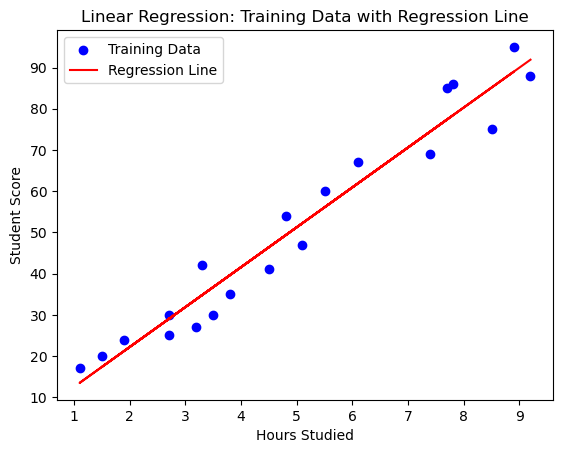

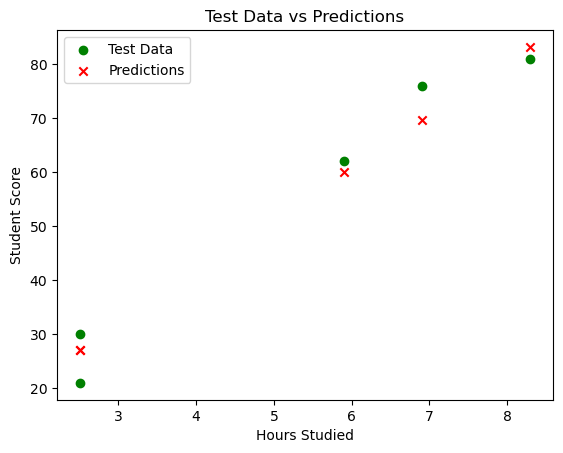

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# We load the Student Study Hours regression dataset
df = pd.read_csv('score.csv')

# X = feature = hours studied
# y = target = test scores
X = df[["Hours"]]
y = df["Scores"]

# We use 80% of the data to train and 20% to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We fit our features to our targets to generate our linear regression model using our 
# training data 
model = LinearRegression()
model.fit(X_train, y_train)

# We get our predictions on our test data
predictions = model.predict(X_test)
print(predictions[:3])  # Print first 3 predictions to inspect

# Visualizing the regression line on the training data
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.plot(X_train, model.predict(X_train), color="red", label="Regression Line")
plt.xlabel("Hours Studied")
plt.ylabel("Student Score")
plt.title("Linear Regression: Training Data with Regression Line")
plt.legend()
plt.show()

# Visualizing the predictions on the test data
plt.scatter(X_test, y_test, color="green", label="Test Data")
plt.scatter(X_test, predictions, color="red", marker="x", label="Predictions")
plt.xlabel("Hours Studied")
plt.ylabel("Student Score")
plt.title("Test Data vs Predictions")
plt.legend()
plt.show()


# Section 3. Regularization

- restricting a model to avoid overfitting by shrinking the coefficient estimates to zero. 

To avoid overfitting we control the model’s complexity by adding a penalty to the model’s loss function:

$$\text{ Regularization} = \text{Loss Function} + \text{Penalty} $$

There are three commonly used regularization techniques to control the complexity of machine learning models, as follows:

* L2 regularization
* L1 regularization
* Elastic Net


## L2 regularisation

A *ridge* regression -- a regularization term is added to the cost function of the linear regression, which keeps the magnitude of the model’s weights (coefficients) as small as possible. The L2 regularization technique tries to keep the model’s weights close to zero, but not zero, which means each feature should have a low impact on the output while the model’s accuracy should be as high as possible.
 
 $$ \text{Ridge Regression Cost Function} = \text{Loss Function} + \frac{1}{2}\lambda \sum_{j=1}^m \omega_j^2$$

Where $\lambda$  controls the strength of regularization, and  $\omega$ are the model’s weights (coefficients).

By increasing $\lambda$, the model becomes flattered and underfit. On the other hand, by decreasing $\lambda$, the model becomes more overfit, and with $\lambda = 0$, the regularization term will be eliminated.

In [ ]:
# rember to reshape the X list in order to have a two dimensional array. 
# Since we have only one feature the reshape looks like below: 
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.7).fit(X_train, y_train)

print(f"Ridge Regression-Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Ridge Regression-Test set score: {ridge.score(X_test, y_test):.2f}")

## L1 Regularization

Least Absolute Shrinkage and Selection Operator (lasso) regression is an alternative to ridge for regularizing linear regression. Lasso regression also adds a penalty term to the cost function, but slightly different, called $L1$ regularization. $L1$ regularization makes some coefficients zero, meaning the model will ignore those features. Ignoring the least important features helps emphasize the model’s essential features.

$$ \text{Lasso Regrestion Cost Function} = \text{Loss Function} + r \lambda \sum_{j=1}^m |wj|$$

Where $\lambda$  controls the strength of regularization, and $\omega$ are the model’s weights (coefficients).

Lasso regression automatically performs feature selection by eliminating the least important features.

In [ ]:
# rember to reshape the X list in order to have a two dimensional array. 
# Since we have only one feature the reshape looks like below: 
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0).fit(X_train, y_train)

print(f"Lasso Regression-Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Lasso Regression-Test set score: {lasso.score(X_test, y_test):.2f}")

## Elastic Net
The Elastic Net is a regularized regression technique combining ridge and lasso’s regularization terms. The 
 parameter controls the combination ratio. When 
, the L2 term will be eliminated, and when 
, the L1 term will be removed.

$$\text{Elastic Net Cost Function} = \text{Loss Function} + r \lambda \sum_{j=1}^m |wj|+ \dfrac{(1-r)}{2} \lambda\sum_{j=1}^m w_j^2$$

Although combining the penalties of lasso and ridge usually works better than only using one of the regularization techniques, adjusting two parameters, 
 and 
, is a little tricky.

In [ ]:
# rember to reshape the X list in order to have a two dimensional array. 
# Since we have only one feature the reshape looks like below: 
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.01).fit(X_train, y_train)

print(f"Elastic Net-Training set score: {elastic_net.score(X_train, y_train):.2f}")
print(f"Elastic Net-Test set score: {elastic_net.score(X_test, y_test):.2f}")

***Exercise 3***

For your build previous model perform all three regularizations presented here.  

Ridge Regression - Training set score: 0.95
Ridge Regression - Test set score: 0.97
Lasso Regression - Training set score: 0.95
Lasso Regression - Test set score: 0.97
Elastic Net - Training set score: 0.95
Elastic Net - Test set score: 0.97


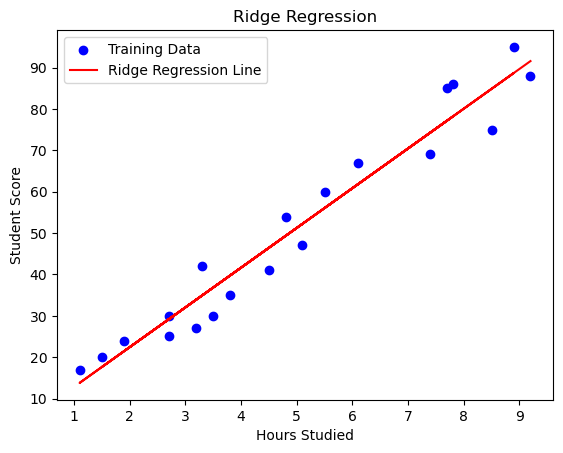

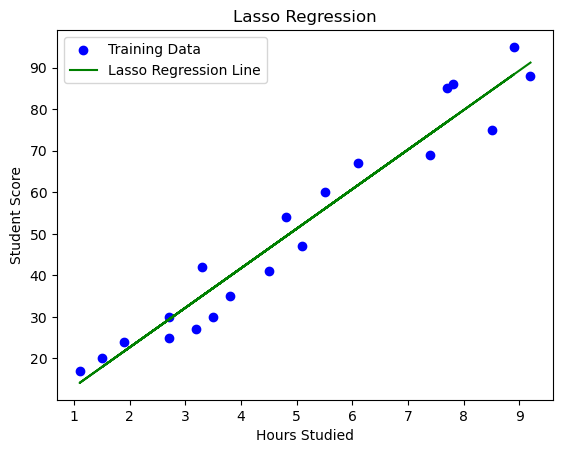

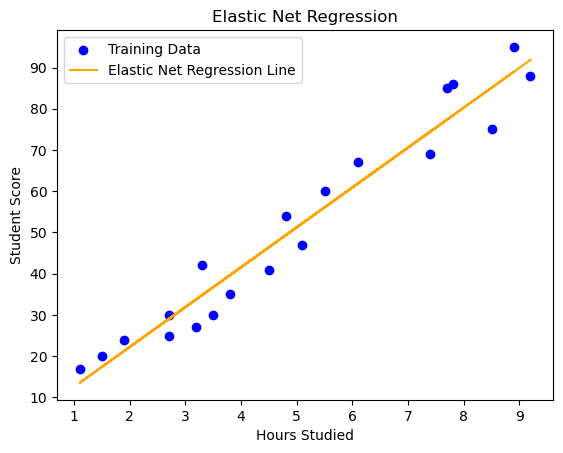

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Load the dataset
df = pd.read_csv('score.csv')

# X = feature (hours studied)
# y = target (test scores)
X = df[["Hours"]]
y = df["Scores"]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data to be a 2D array (for single feature)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# 1. L2 Regularization (Ridge Regression)
ridge = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge.fit(X_train, y_train)

print(f"Ridge Regression - Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Ridge Regression - Test set score: {ridge.score(X_test, y_test):.2f}")

# 2. L1 Regularization (Lasso Regression)
lasso = Lasso(alpha=1.0)  # alpha controls the regularization strength
lasso.fit(X_train, y_train)

print(f"Lasso Regression - Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Lasso Regression - Test set score: {lasso.score(X_test, y_test):.2f}")

# 3. Elastic Net Regularization
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5)  # alpha is the regularization strength, l1_ratio controls the mix
elastic_net.fit(X_train, y_train)

print(f"Elastic Net - Training set score: {elastic_net.score(X_train, y_train):.2f}")
print(f"Elastic Net - Test set score: {elastic_net.score(X_test, y_test):.2f}")

# Visualizing the models

# Plotting Ridge regression
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.plot(X_train, ridge.predict(X_train), color="red", label="Ridge Regression Line")
plt.xlabel("Hours Studied")
plt.ylabel("Student Score")
plt.legend()
plt.title("Ridge Regression")
plt.show()

# Plotting Lasso regression
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.plot(X_train, lasso.predict(X_train), color="green", label="Lasso Regression Line")
plt.xlabel("Hours Studied")
plt.ylabel("Student Score")
plt.legend()
plt.title("Lasso Regression")
plt.show()

# Plotting Elastic Net regression
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.plot(X_train, elastic_net.predict(X_train), color="orange", label="Elastic Net Regression Line")
plt.xlabel("Hours Studied")
plt.ylabel("Student Score")
plt.legend()
plt.title("Elastic Net Regression")
plt.show()
